# Descriptive statistics and Visualization

# 1.Import libraries & Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Load the Titanic dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic = pd.read_csv(url)

# Display the first few rows of the dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# 2.Handle missing values

In [2]:
# Handle missing values in 'Age' column by filling with median
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# Drop rows where 'Embarked' column has missing values
if 'Embarked' in titanic.columns:
    titanic = titanic.dropna(subset=['Embarked'])

# Verify if there are any missing values left
print("\nMissing Values After Cleaning:")
print(titanic.isnull().sum())


Missing Values After Cleaning:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64



Duplicate Rows Before Removal:
0

Duplicate Rows After Removal:
0


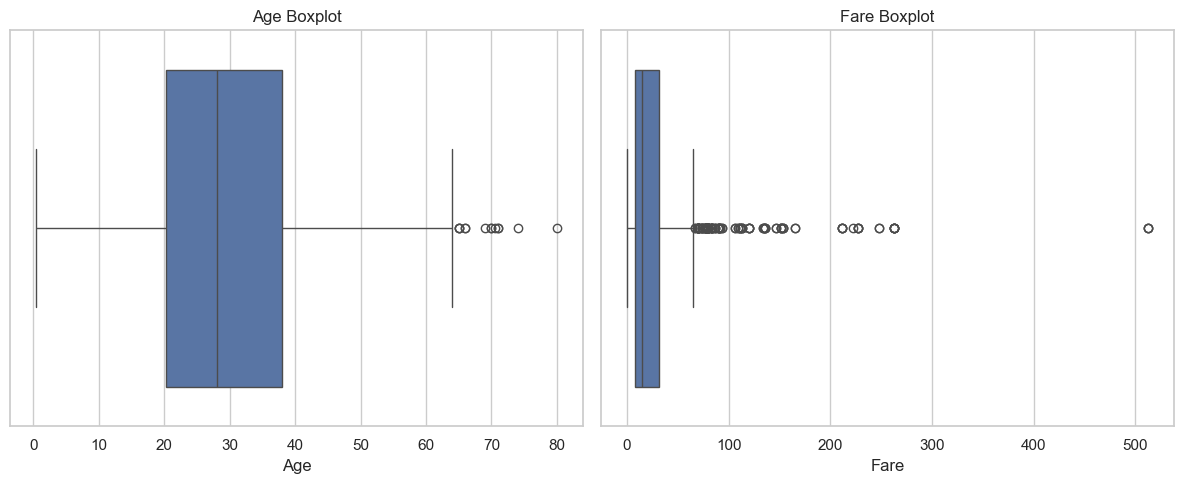

In [3]:
# Convert categorical columns to numerical values
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical values if it exists
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Check for duplicates
print("\nDuplicate Rows Before Removal:")
print(titanic.duplicated().sum())

titanic = titanic.drop_duplicates()

print("\nDuplicate Rows After Removal:")
print(titanic.duplicated().sum())

# Boxplots to check for outliers
plt.figure(figsize=(12, 5))

# Age Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['Age'])
plt.title('Age Boxplot')

# Fare Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic['Fare'])
plt.title('Fare Boxplot')

plt.tight_layout()
plt.show()

In [4]:
# Save the cleaned dataset
titanic.to_csv('cleaned_titanic.csv', index=False)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB


In [7]:
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,0,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,1,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,1,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,0,26.0,0,0,30.0000


 # 3.Calculate descriptive statistics

In [8]:
# Descriptive statistics
# Mean
mean_age = titanic['Age'].mean()
mean_fare = titanic['Fare'].mean()

# Median
median_age = titanic['Age'].median()
median_fare = titanic['Fare'].median()

# Mode
mode_age = titanic['Age'].mode()[0]
mode_fare = titanic['Fare'].mode()[0]

# Standard Deviation
std_age = titanic['Age'].std()
std_fare = titanic['Fare'].std()

# Display the results
print(f"Mean Age: {mean_age}, Mean Fare: {mean_fare}")
print(f"Median Age: {median_age}, Median Fare: {median_fare}")
print(f"Mode Age: {mode_age}, Mode Fare: {mode_fare}")
print(f"Standard Deviation Age: {std_age}, Standard Deviation Fare: {std_fare}")

Mean Age: 29.471443066516347, Mean Fare: 32.30542018038331
Median Age: 28.0, Median Fare: 14.4542
Mode Age: 22.0, Mode Fare: 8.05
Standard Deviation Age: 14.12190840546256, Standard Deviation Fare: 49.78204040017391


# 4.Create visualizations

4.1 Histograms:

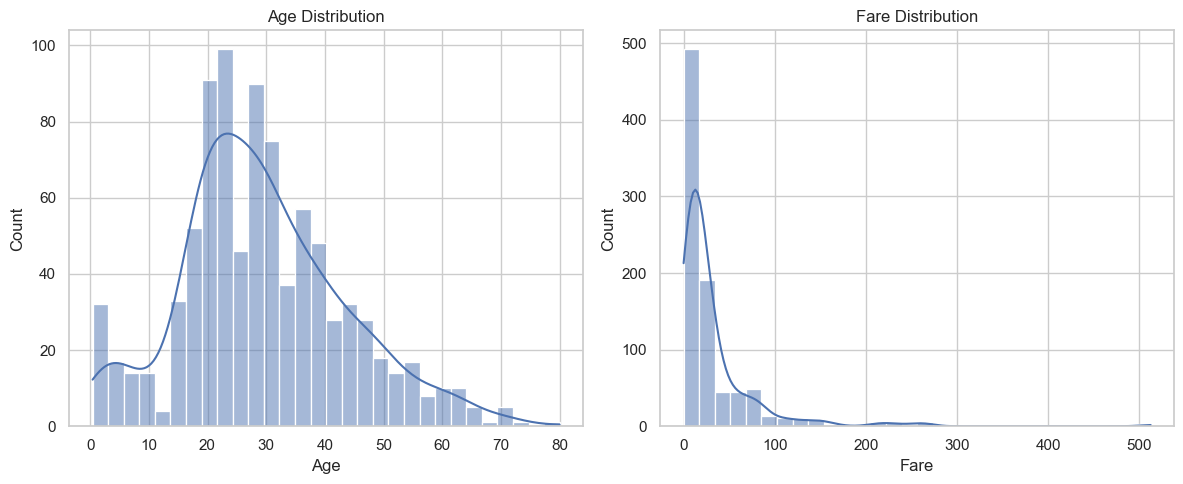

In [9]:
# Histograms
plt.figure(figsize=(12, 5))

# Age Histogram
plt.subplot(1, 2, 1)
sns.histplot(titanic['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# Fare Histogram
plt.subplot(1, 2, 2)
sns.histplot(titanic['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

#4.2 Scatter plot (Age vs Fare):

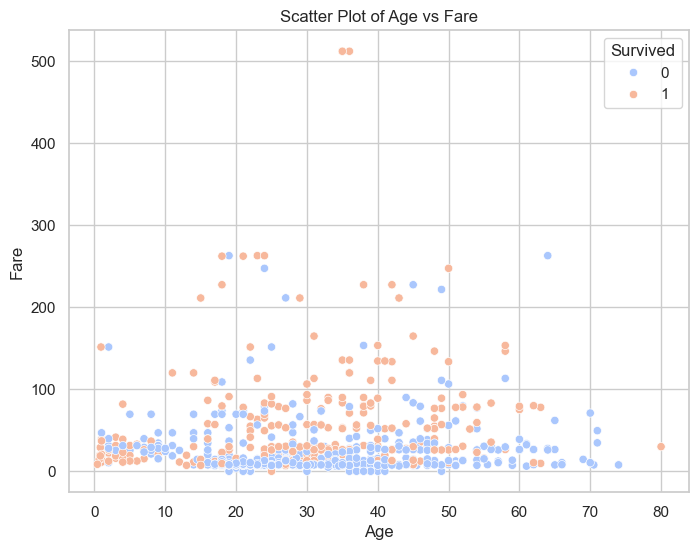

In [10]:
# Scatter plot (Age vs Fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=titanic, hue='Survived', palette='coolwarm')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

4.3 Bar plot (Survival by Gender):

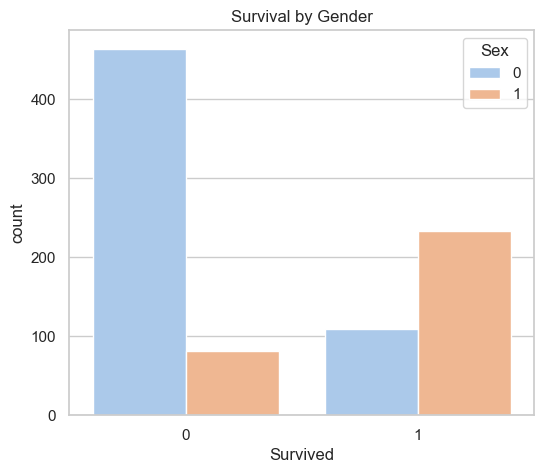

In [11]:
# Bar plot (Survival by Gender)
plt.figure(figsize=(6, 5))
sns.countplot(x='Survived', hue='Sex', data=titanic, palette='pastel')
plt.title('Survival by Gender')
plt.show()